In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
df = pd.read_csv('tuma/tuma/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [9]:
# Separar as features (X) e o target (y)
X = df.drop(columns=['species'])
y = df['species']

In [10]:
arvore_cross1 = DecisionTreeClassifier(criterion='entropy')
scores_arvore_cross1 = cross_val_score(arvore_cross1, X, y, cv=10)

# Resultados
print("Acurácias em cada fold:", scores_arvore_cross1)
print("Acurácia média:", scores_arvore_cross1.mean())

Acurácias em cada fold: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Acurácia média: 0.9533333333333334


In [11]:
# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [12]:
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))


--- Árvore de Decisão ---
Acurácia: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.85      0.92        13
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Matriz de Confusão:
[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]


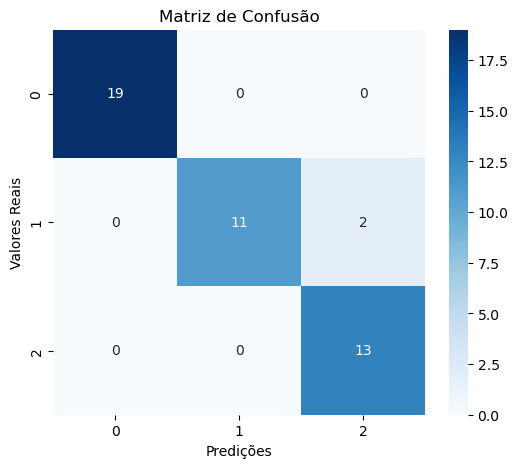

In [13]:
cm = confusion_matrix(y_test, y_pred_dt)
labels = np.unique(y_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.show()